# Histogram plots for temp and humid (DC, GH & OUT)

## Import dependencies and data

In [32]:
# import dependencies
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# define relevant paths
home_path = os.path.dirname(os.getcwd())
data_path = home_path + '\\data\\'
plot_path = home_path + '\\plotting\\plots\\'

In [37]:
# set seaborn style/theme
sns.set_theme()
sns.set_style('white')

In [38]:
# get merged data
data = pd.read_csv(
    data_path + 'data_merged.csv',
    header=[0, 1],
    index_col=[0, 1, 2, 3]
)

# convert index.date col to datetime
#data.index = pd.to_datetime(data.index.values)
data.index = data.index.set_levels(
    levels=pd.to_datetime(data.index.get_level_values(3).values),
    level=3
)

# drop all index levels except date
data = data.droplevel(
    level=[0, 1, 2], 
    axis=0
)

In [39]:
# keep only temp & humidity
data = data[[
    'temperatures',
    'humidity'
]].copy()

# filter out variables
data = data.filter(
    regex='GM10X|DC_GT401|SMHI(?!_)', 
    axis=1
)

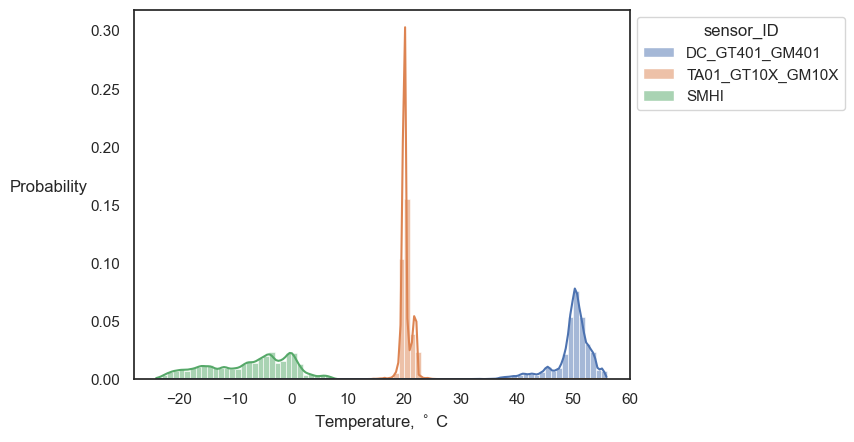

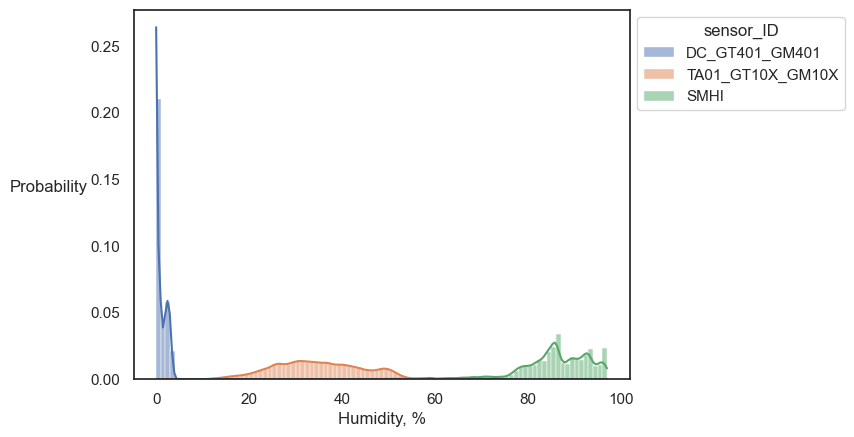

In [60]:
ax = sns.histplot(data=data.temperatures, stat='probability', binwidth=1.0, kde=True, legend='full')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Temperature, $^\circ$ C')
plt.ylabel('Probability', loc='center', rotation=0, fontsize=12, labelpad=30)
#plt.savefig....
plt.show()

ax = sns.histplot(data=data.humidity, stat='probability', binwidth=1.0, kde=True, legend='full')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Humidity, %')
plt.ylabel('Probability', loc='center', rotation=0, fontsize=12, labelpad=30)
#plt.savefig....
plt.show()